## 파생변수추가 주당평균데이터
## 여기서 살펴볼 것은 이탈, 비이탈의 차이점을 보이는 피쳐 살피기

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("../3.통합/4.주당평균_파생변수/train_create_mean.csv")
test = pd.read_csv("../3.통합/4.주당평균_파생변수/test_create_mean.csv")

print(train.shape)
print(test.shape)
print("----------------------------")
print("----------------------------")
print(train.head())
print(test.head())
print("----------------------------")
print("----------------------------")
print(train.columns)
print(test.columns)

(100000, 116)
(40000, 115)
----------------------------
----------------------------
                                              acc_id     label  activated_wk  \
0  0000264b01392acfde44f9d8494f112a701dc5d3e5fda6...      week             2   
1  0001f130e89288ff0df167b998f6eb7085687f411fcb72...  retained             8   
2  00028f0ad71c07f48aef465fd0c98ba6e3f0f3de3d2f7d...  retained             5   
3  00036e5b6a197c196fa10fc0ad4e2853b22294dff64d27...     month             6   
4  00037fe8e712041a476b8b1b827583cbc34895844057f0...    2month             2   

   avg_cnt_dt  avg_play_time    avg_npc_exp  avg_npc_hongmun  avg_quest_exp  \
0    6.000000    7227.625000  205818.000000     41765.500000   1.370501e+07   
1    3.125000       1.637500       0.000000         0.000000   0.000000e+00   
2    2.400000       7.763333       5.600000         0.000000   1.722000e+03   
3    5.166667     267.033333    1626.333333      3919.166667   4.314633e+05   
4    1.500000      10.875000      14.00

# 파생변수 설명
* X1 : 플레이시간 대비 전투시간
* X2 : 플레이시간 대비 파티시간
* X3 : 전체 몹 경험치
* X4 : 전체 퀘스트 경험치
* X5 : 전체 홍문 경험치
* X6 : 전체 경험치
* X7 : 단위시간당 경험치
* X8 : 단위시간당 얻은 금화
* X9 : 전체 인던 입장 횟수
* X10 : 전체 레이드 입장 횟수
* X11 : 인던 + 레이드 입장 횟수
* X12 : 전체 인던 클리어 횟수
* X13 : 전체 레이드 클리어 횟수
* X14 : 인던 + 레이드 클리어 횟수
* X15 : 전체 채팅 횟수
* X16 : 일반 채팅 비율
* X17 : 귓속말 비율
* X18 : 지역 채팅 비율
* X19 : 파티 채팅 비율
* X20 : 길드 채팅 비율
* X21 : 세력 채팅 비율
* X22 : 단위시간당 채팅 횟수
* X23 : 주간 얻은 금화
* X24 : 거쳐간 금화 절대값
* X25 : 얻은 잡화
* X26 : 거쳐간 잡화 절대값
* X27 : 단위시간당 X23
* X28 : 단위시간당 X24
* X29 : 단위시간당 X25
* X30 : 단위시간당 X26
* X31 : 채집, 제작 횟수
* X32 : 단위시간당 X31
* X33 : 단위시간당 거래 횟수
* X34 : 단위시간당 유료결제량

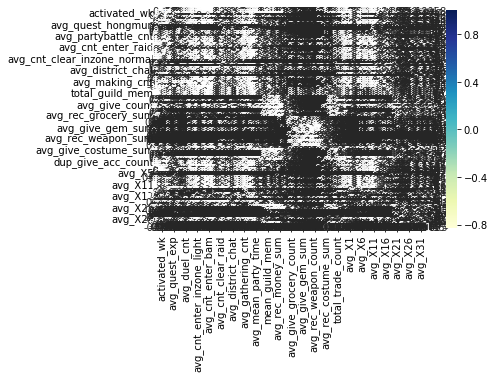

In [3]:
correlations = train.corr(method='pearson')
sns.heatmap(correlations, cmap="YlGnBu", annot = True)
plt.show()

## 상관계수 살펴보기

In [4]:
correlations_abs_sum = correlations.abs().sum()
correlations_abs_sum
print("낮은 것 10개")
print(correlations_abs_sum.nsmallest(10))
print("높은 것 20개")
print(correlations_abs_sum.nlargest(20))

낮은 것 10개
avg_X34                  1.436264
avg_X21                  1.651969
avg_gathering_cnt        1.918336
avg_X8                   2.440177
avg_rec_weapon_sum       2.752878
avg_X27                  2.777655
avg_give_weapon_sum      3.417221
avg_X28                  3.719258
avg_X29                  3.720449
avg_give_weapon_count    3.887104
dtype: float64
높은 것 20개
avg_party_time                 27.361933
avg_play_time                  26.011174
avg_game_combat_time           25.306060
avg_mean_party_mem             24.694287
avg_X10                        24.018342
avg_X13                        23.682892
avg_guild_chat                 23.622711
avg_cnt_clear_raid             23.569074
avg_cnt_enter_raid             23.559851
avg_cnt_clear_inzone_normal    23.491167
avg_cnt_enter_inzone_normal    23.342680
avg_party_mem_count            22.784262
avg_X31                        22.688971
avg_making_cnt                 22.674174
avg_X11                        22.158394
avg_cnt_clea

- play_time과 거래데이터, 채팅데이터를 활용한 파생변수의 상관계수가 낮다
- 하지만, 높은 상관성의 파생변수들이 여럿 보인다

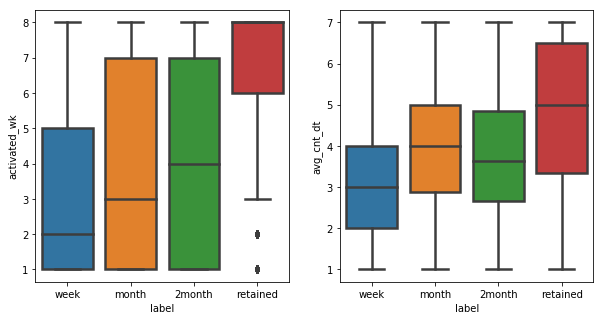

In [5]:
plt.rcParams["figure.figsize"] = (10, 5)
order = ["week", "month", "2month", "retained"]

fig, axis = plt.subplots(ncols=2)
sns.boxplot(x='label', y='activated_wk', data=train, linewidth=2.5, ax=axis[0], order=order)
sns.boxplot(x='label', y='avg_cnt_dt', data=train, linewidth=2.5, ax=axis[1], order=order)
plt.show()

- 파생변수 더하지 않은상태로 구한 피처들의 분포들은 앞과 같다.
- 아래는 파생변수의 라벨분포를 찍어본 것이다.

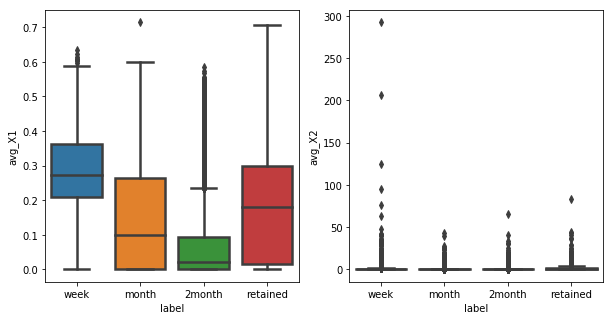

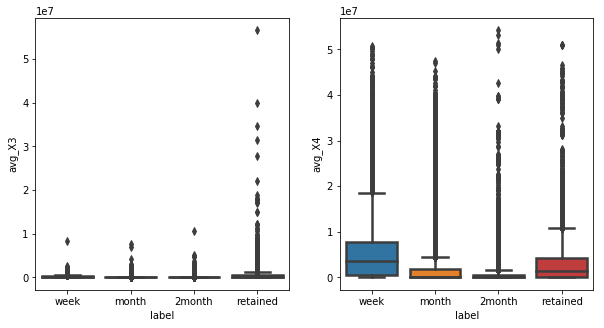

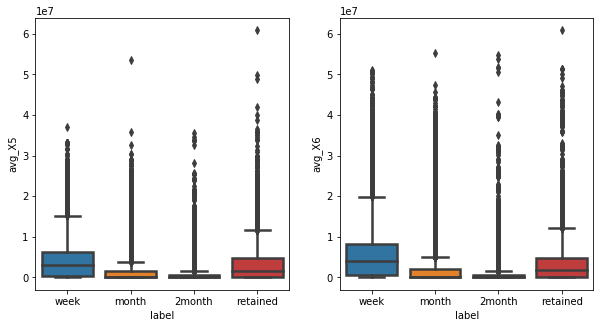

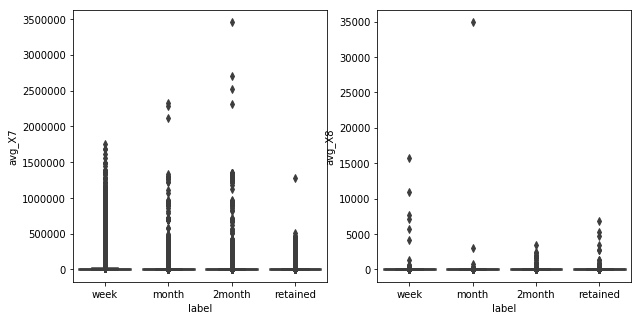

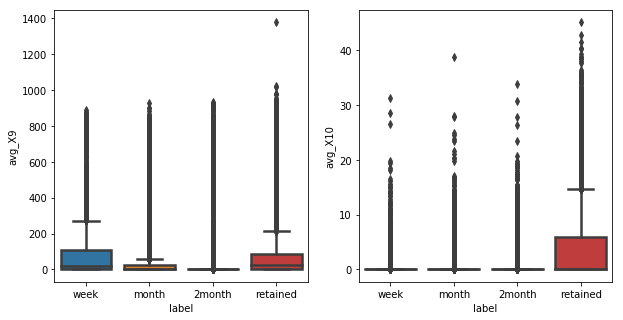

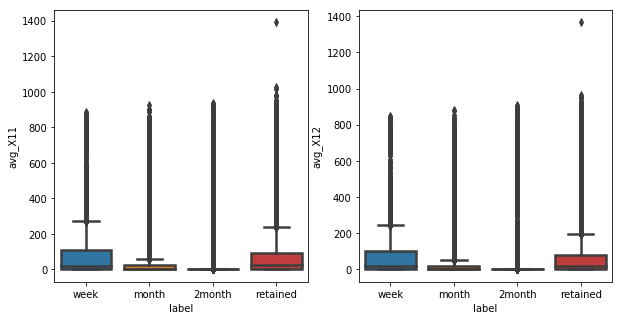

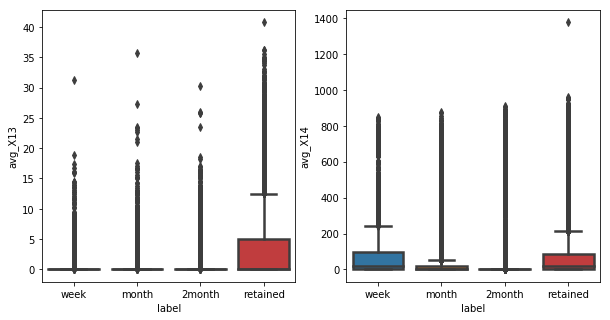

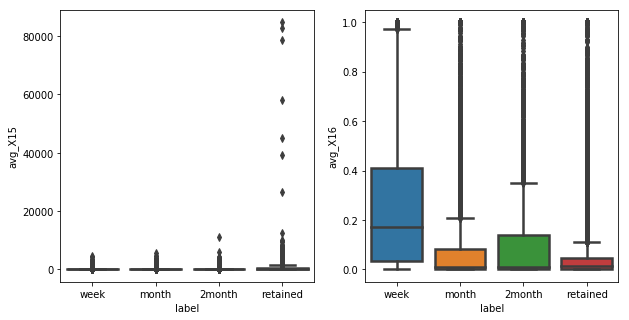

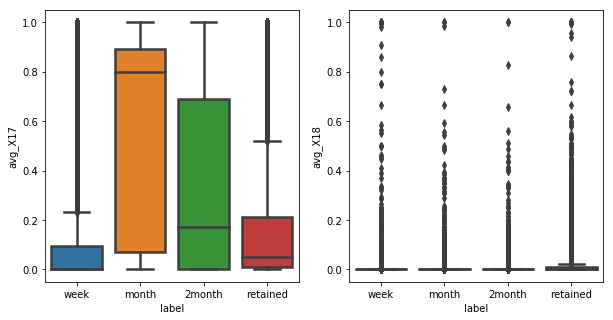

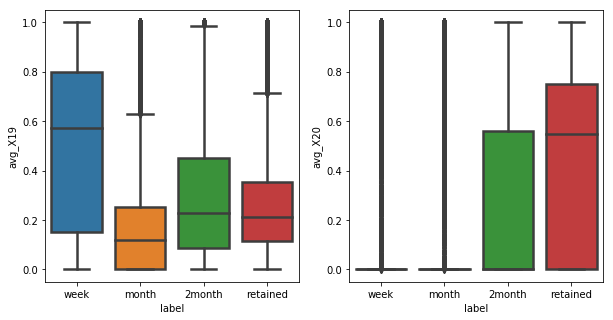

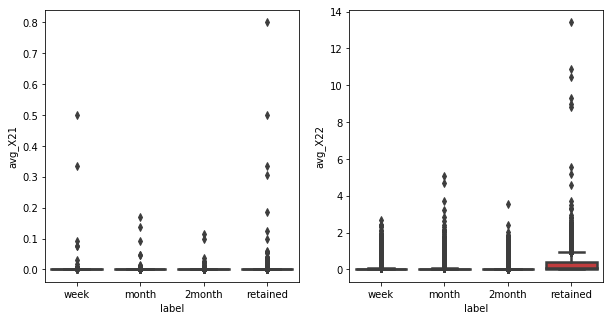

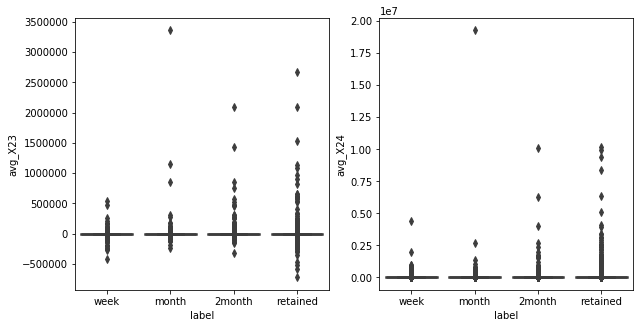

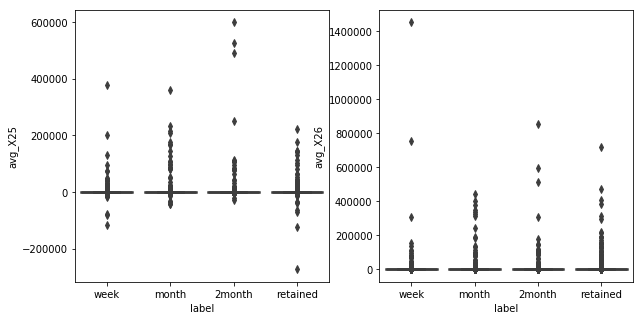

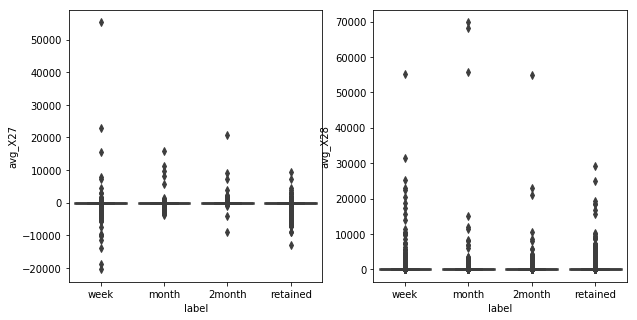

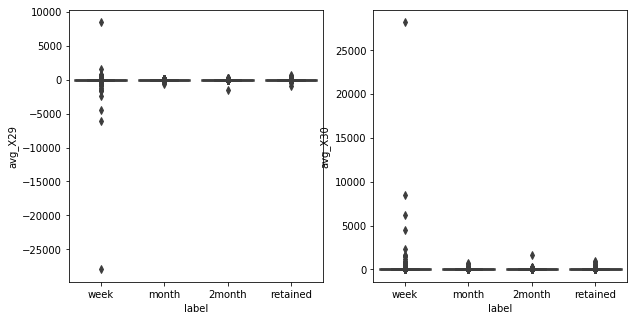

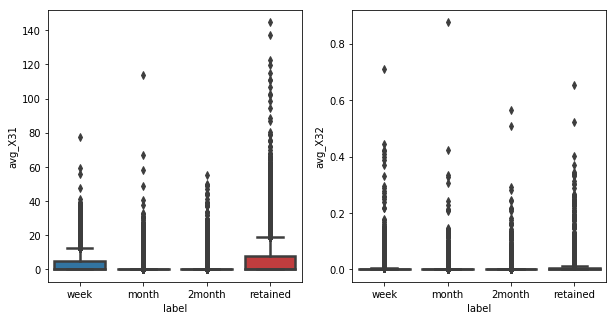

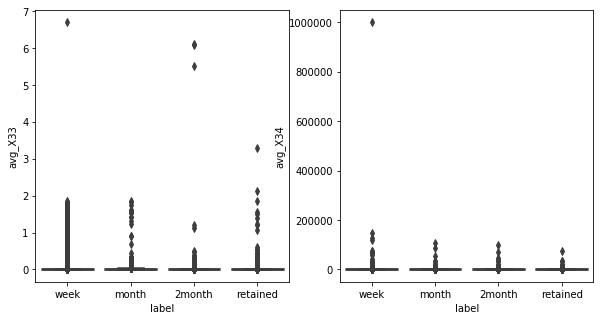

In [6]:
for i in range(17):
    fig, axis = plt.subplots(ncols=2)
    sns.boxplot(x='label', y='avg_X{}'.format(2*i+1), data=train, linewidth=2.5, ax=axis[0], order=order)
    sns.boxplot(x='label', y='avg_X{}'.format(2*(i+1)), data=train, linewidth=2.5, ax=axis[1], order=order)
    plt.show()